In [ ]:
import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from IPython.display import display
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import numpy as np
from keras.layers import *
from keras.models import *
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
!unzip Dataset5.zip

Archive:  Dataset5.zip
replace Dataset5/Test/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Dataset5/Test/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: Dataset5/Test/Covid/0a7faa2a.jpg  
  inflating: Dataset5/Test/Covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: Dataset5/Test/Covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: Dataset5/Test/Covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: Dataset5/Test/Covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: Dataset5/Test/Covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: Dataset5/Test/Covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: Dataset5/Test/Covid/1-s2.0-S1684118220300682-main.pdf-003-b2.png  
  inflating: Dataset5/Test/Covid/1-s2.0-S2214250920300834-gr1_lrg-b.png  
  inflating: Dataset5/Test/Covid/1-s2.0-S2214250920300834-gr1_lrg-c.png  
  inflating: Dataset5/Test/Covid/1-s2.0-S238702

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [ ]:
train_path = "Dataset5/Train"
valid_path = "Dataset5/Test"

In [ ]:
# add preprocessing layer to the front of VGG

resnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
 # useful for getting number of classes
folders = glob('Dataset5/Train/*')

In [ ]:
model = Sequential()
model.add(resnet)
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                1605696   
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 21,630,145
Trainable params: 1,605,761
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
training_set = train_datagen.flow_from_directory(
    'Dataset5/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 829 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(
    'Dataset5/Test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
    )

Found 118 images belonging to 2 classes.


In [ ]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=26,
  validation_steps=2
)

Epoch 1/25
26/26 [==============================] - 27s 1s/step - loss: 0.0483 - accuracy: 0.9891 - val_loss: 0.1038 - val_accuracy: 0.9531
Epoch 2/25
26/26 [==============================] - 27s 1s/step - loss: 0.0448 - accuracy: 0.9867 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 3/25
26/26 [==============================] - 27s 1s/step - loss: 0.0453 - accuracy: 0.9831 - val_loss: 0.0301 - val_accuracy: 0.9844
Epoch 4/25
26/26 [==============================] - 27s 1s/step - loss: 0.0426 - accuracy: 0.9916 - val_loss: 0.0974 - val_accuracy: 0.9688
Epoch 5/25
26/26 [==============================] - 27s 1s/step - loss: 0.0504 - accuracy: 0.9819 - val_loss: 0.0277 - val_accuracy: 0.9844
Epoch 6/25
26/26 [==============================] - 27s 1s/step - loss: 0.0521 - accuracy: 0.9723 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 7/25
26/26 [==============================] - 27s 1s/step - loss: 0.0657 - accuracy: 0.9686 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 8/25
26/26 [==

In [ ]:
model.evaluate_generator(training_set)

[0.0038371009286493063, 0.9987937211990356]

In [ ]:
model.evaluate_generator(test_set)

[0.0030567857902497053, 1.0]

In [ ]:
y_actual = []
y_test = []

In [ ]:
import os
for i in os.listdir("./Dataset5/Test/Normal/"):
  img = image.load_img("./Dataset5/Test/Normal/"+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [ ]:
for i in os.listdir("./Dataset5/Test/Covid/"):
  img = image.load_img("./Dataset5/Test/Covid/"+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
import seaborn as sns


In [ ]:
import seaborn as sns
cm = confusion_matrix(y_actual, y_test)

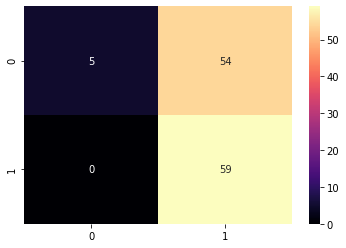

In [ ]:
sns.heatmap(cm, cmap="magma", annot= True)

In [ ]:
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_actual, y_test)

In [ ]:
from sklearn.metrics import auc
auc_keras = auc(fpr, tpr)

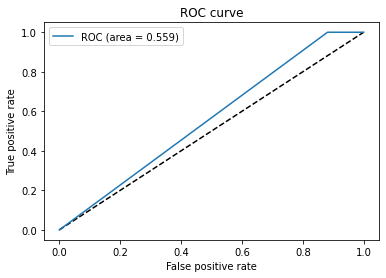

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

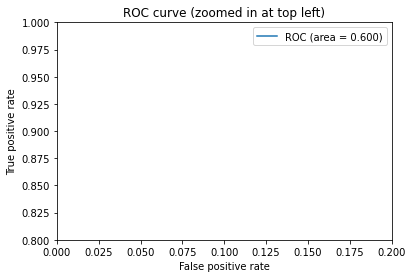

In [ ]:
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()